In [1]:
import math
from itertools import islice
import numpy as np
import shapely

## Circle lines

In [2]:
degs = range(-90, 91)
print("degs", degs[0], degs[-1])
rads = tuple(math.radians(p) for p in degs)
print("rads", rads[0], rads[-1])

degs -90 90
rads -1.5707963267948966 1.5707963267948966


In [3]:
coords = tuple((math.cos(t), math.sin(t)) for t in rads)
print("coords", coords[0], coords[-1])
print(f"{len(coords)} coordinate pairs")

coords (6.123233995736766e-17, -1.0) (6.123233995736766e-17, 1.0)
181 coordinate pairs


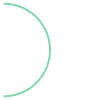

In [4]:
s = shapely.LineString(coords)
display(s)

In [46]:
coords_subset = tuple(islice(coords, 0, None, 8))
print(coords_subset[0], coords_subset[1], coords_subset[-1])
print(len(coords_subset))

(6.123233995736766e-17, -1.0) (0.13917310096006547, -0.9902680687415704) (0.06975647374412523, 0.9975640502598242)
23


In [47]:
line_pairs = [[shapely.Point(x, y), shapely.Point(-x,y)] for (x,y) in coords_subset]
print(line_pairs[1])

[<POINT (0.139 -0.99)>, <POINT (-0.139 -0.99)>]


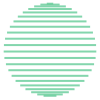

In [48]:
lines = shapely.MultiLineString(line_pairs)
display(lines)

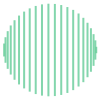

In [55]:
lines_y = shapely.transform(lines, lambda x,y: [y,x], interleaved=False)
display(lines_y)

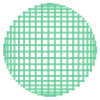

In [50]:
lines_combo = shapely.coverage_union(lines, lines_y)
display(lines_combo)

## Triangle lines

[42.261826174069945, 90.63077870366499]
100.0


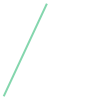

In [8]:
r = math.radians(65)
t_coords = [[h*math.cos(r), h*math.sin(r)] for h in range(0,101)]
print(t_coords[-1])
print(math.sqrt(t_coords[-1][0]**2 + t_coords[-1][1]**2))
display(shapely.LineString(t_coords))

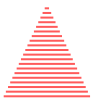

In [9]:
t_line_pairs = [[shapely.Point(-x, -y), shapely.Point(x,-y)] for (x,y) in islice(t_coords, 0, None, 5)]

display(shapely.MultiLineString(t_line_pairs))

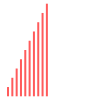

In [10]:
t_line_pairs = [[shapely.Point(x, y), shapely.Point(x,0)] for (x,y) in islice(t_coords, 0, None, 10)]

display(shapely.MultiLineString(t_line_pairs))

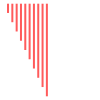

In [11]:
t_line_pairs = [[shapely.Point(x, 0), shapely.Point(x,-y)] for (x,y) in islice(t_coords, 0, None, 10)]

display(shapely.MultiLineString(t_line_pairs))

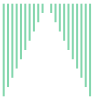

In [24]:
t_line_pairs = [[shapely.Point(-x, 0), shapely.Point(-x,-y)] for (x,y) in islice(t_coords, 0, None, 10)]
shape_1 = shapely.MultiLineString(t_line_pairs)
shape_2 = shapely.transform(shape_1, lambda x,y: [-x, y], interleaved=False)
combo_shape = shapely.coverage_union(shape_1, shape_2)
display(combo_shape)

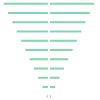

In [32]:
t_line_pairs = [[shapely.Point(0, y), shapely.Point(x + 1,y)] for (x,y) in islice(t_coords, 0, None, 10)]
shape_1 = shapely.MultiLineString(t_line_pairs)
shape_2 = shapely.transform(shape_1, lambda x,y: [-x - 2, y], interleaved=False)
combo_shape = shapely.coverage_union(shape_1, shape_2)
display(combo_shape)